## **Predictive Maintenance Project**

In [1]:
import sklearn
print(sklearn.__version__)

1.5.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset
df = pd.read_csv('ai4i2020.csv')

In [5]:
#view the first 10 rows
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
#statistical description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [8]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [9]:
#find the sum of duplicated rows
df.duplicated().sum()

0

## EDA

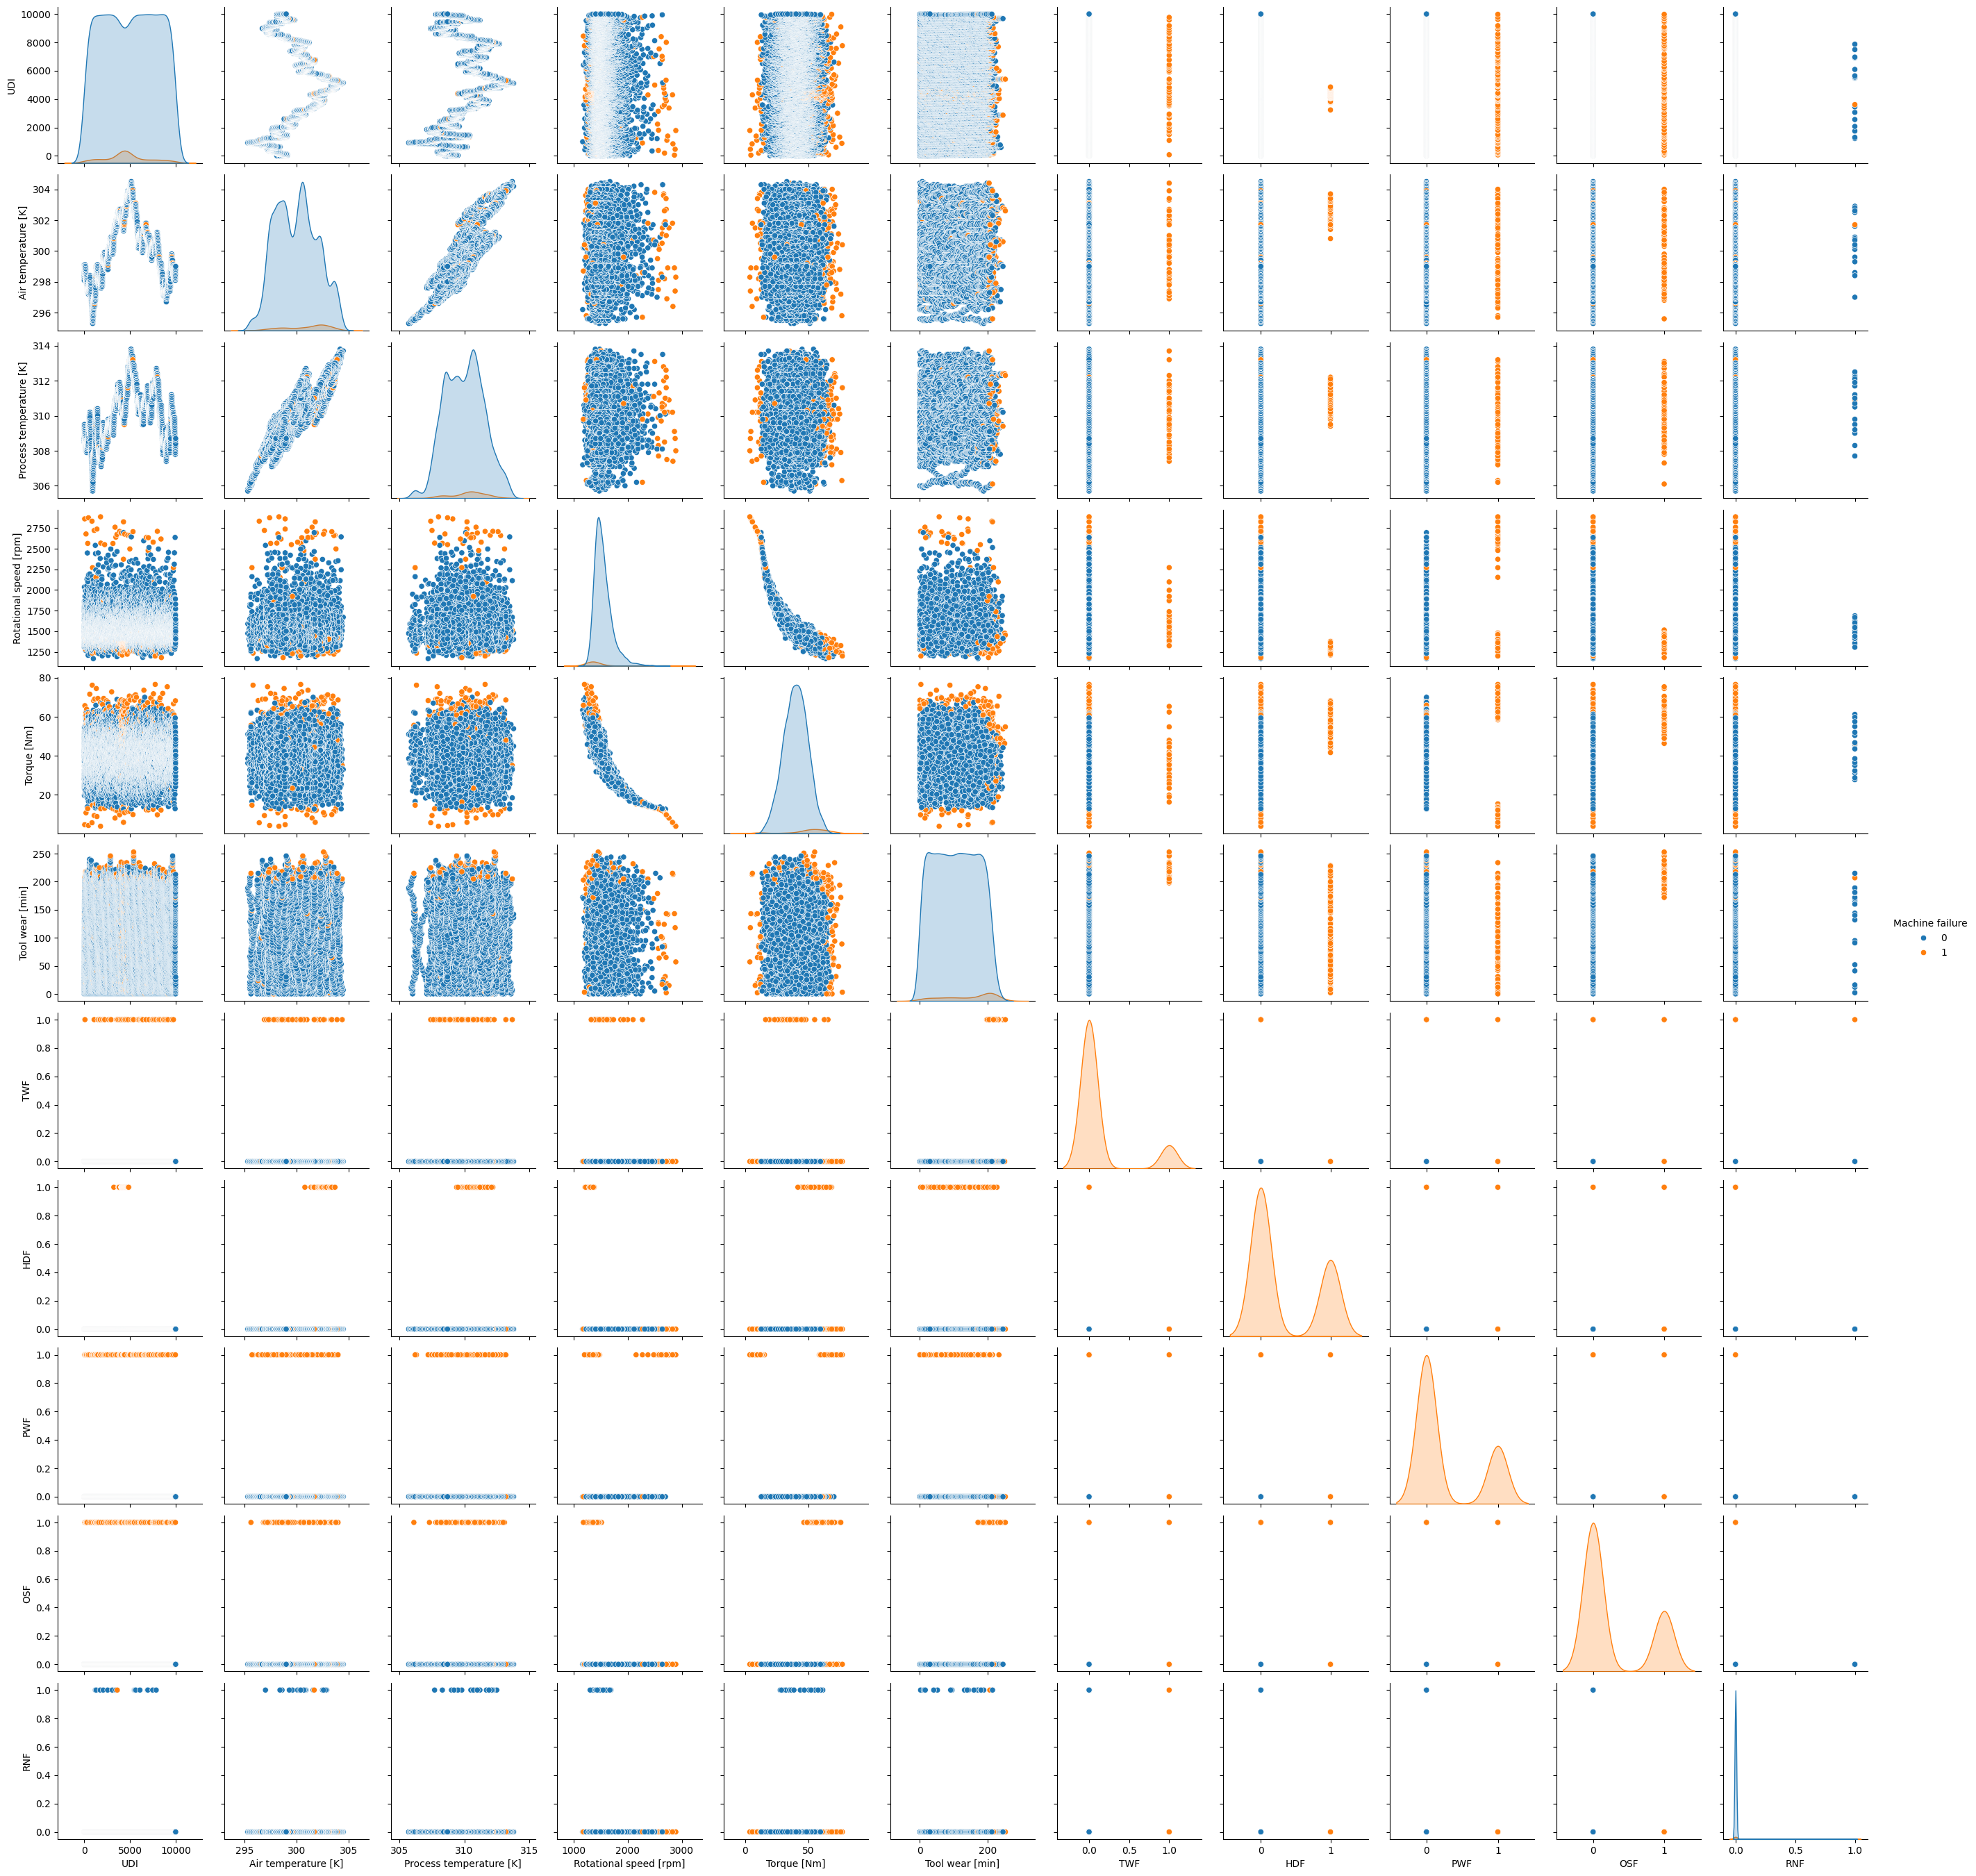

In [10]:
# Visualize the distribution of each feature
sns.pairplot(df, hue="Machine failure", diag_kind='kde')
plt.show()

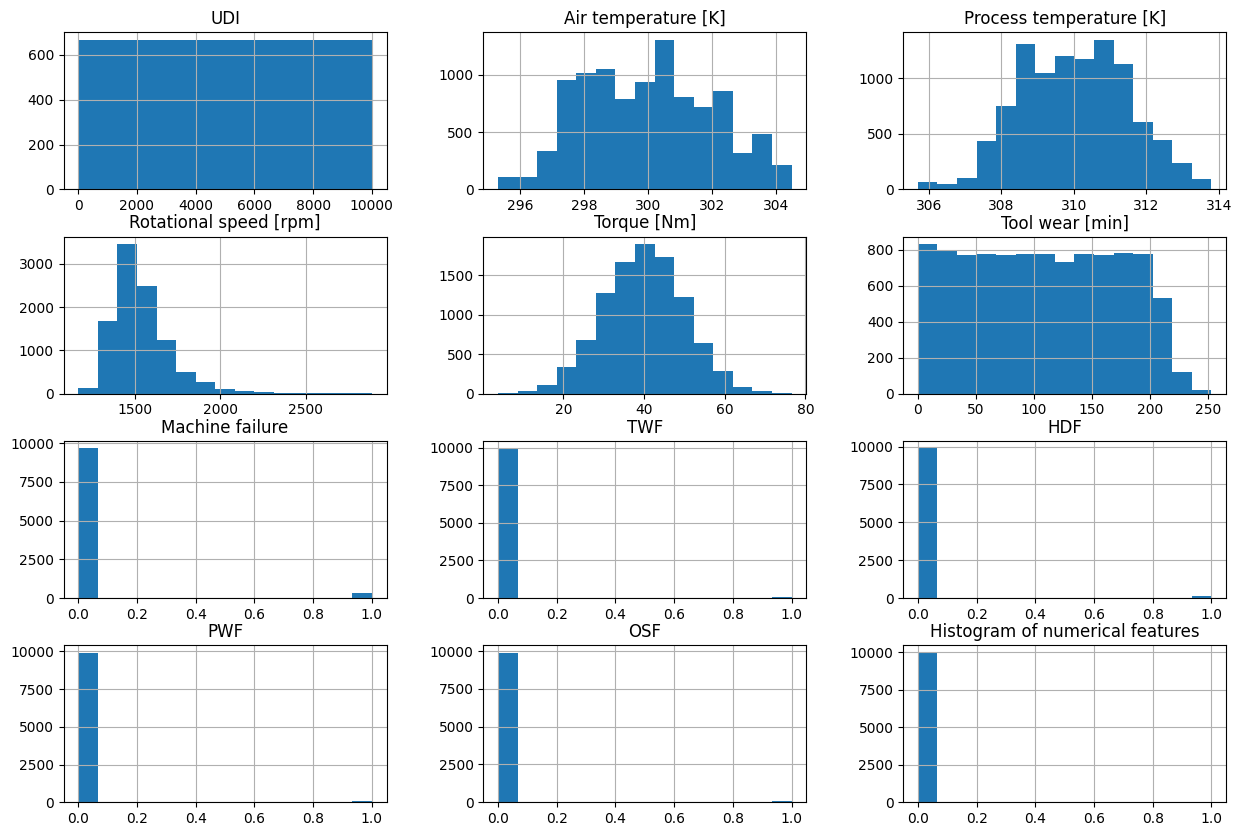

In [11]:
# Visualize the histogram of each numerical feature
df.hist(bins=15, figsize=(15, 10))
plt.title("Histogram of numerical features")
plt.show()

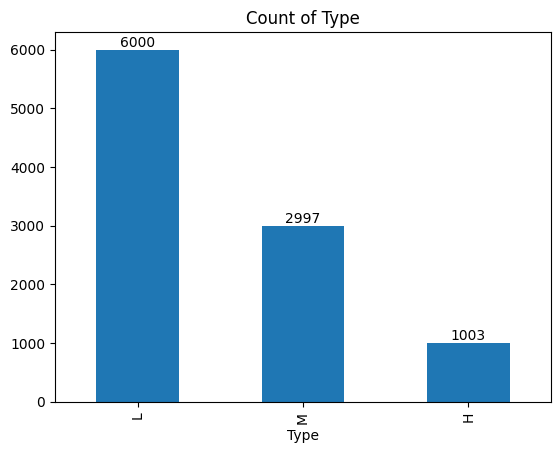

In [12]:
#visualize the distribution of the type column
type_counts = df['Type'].value_counts()
ax = type_counts.plot(kind='bar', x='Type', y='Count', title='Count of Type')

# Annotate each bar with its count
for i, count in enumerate(type_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

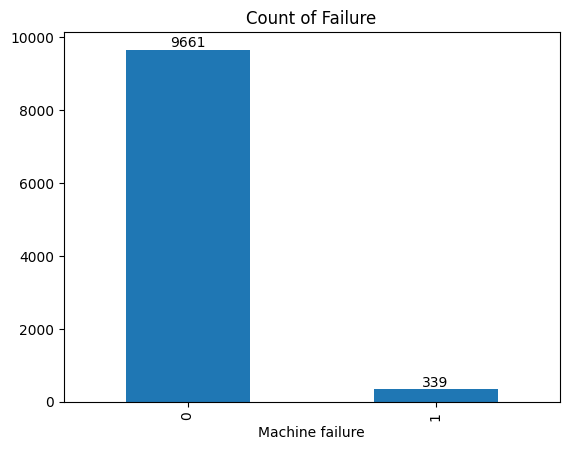

In [ ]:
#bar chart showing count of failure
failure_counts = df['Machine failure'].value_counts()
ax = failure_counts.plot(kind='bar', x='Failure', y='Count', title='Count of Failure')

# Annotate each bar with its count
for i, count in enumerate(failure_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

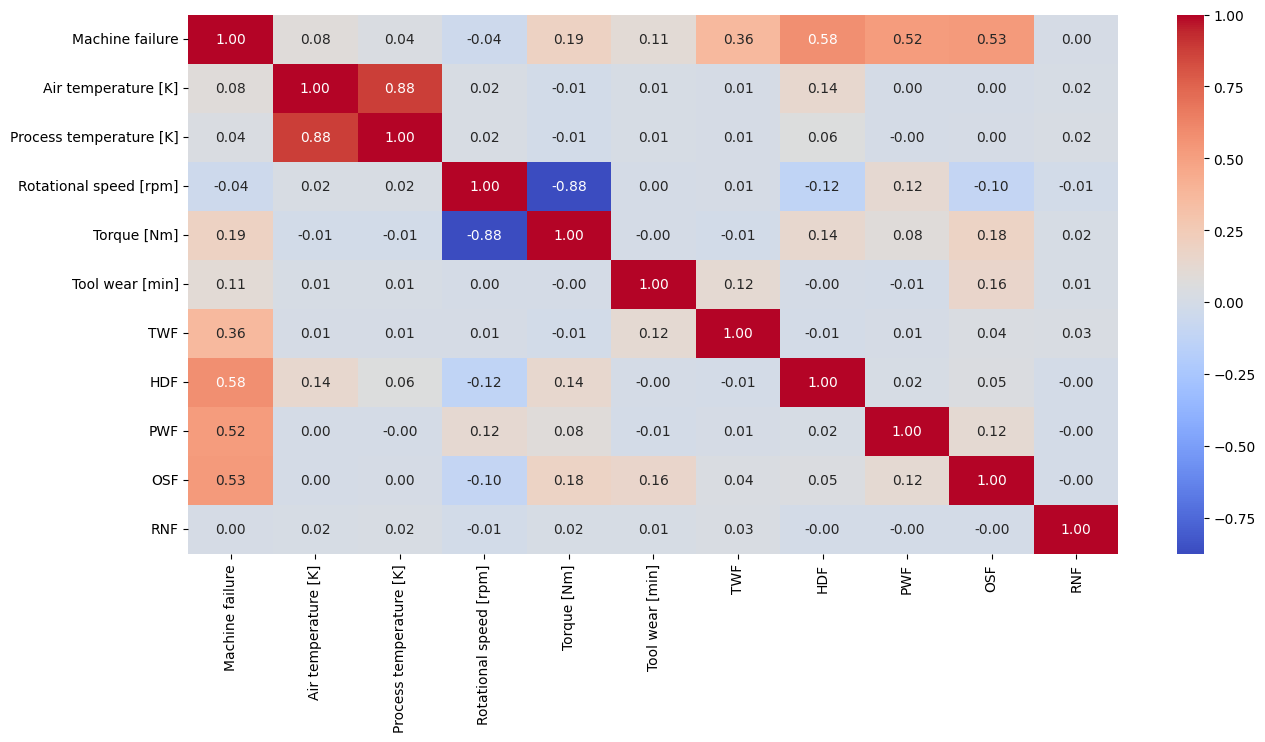

In [14]:
# List of columns to include in the correlation matrix
columns = ['Machine failure', 'Air temperature [K]', 'Process temperature [K]', 
           'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
           'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Subset the DataFrame to include only the desired columns
df_subset = df[columns]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(15, 7))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In our models, we take into consideration:

**Multicollinearity:** Avoid including variables that are highly correlated with each other (if two variables have a correlation close to 1 or -1).

**Correlation with the Target Variable:** The variables that have a higher correlation with the target variable are: Machine failure, TWF, HDF, PWF, OSF, and RNF.

`Air Temperature` and `Process Temperature` have a high positive correlation of 0.88. This suggests that as air temperature increases, process temperature tends to increase as well.

`Torque` and `Rotational Speed` exhibit a significant negative correlation of -0.88. When torque increases, rotational speed tends to decrease, and vice versa.

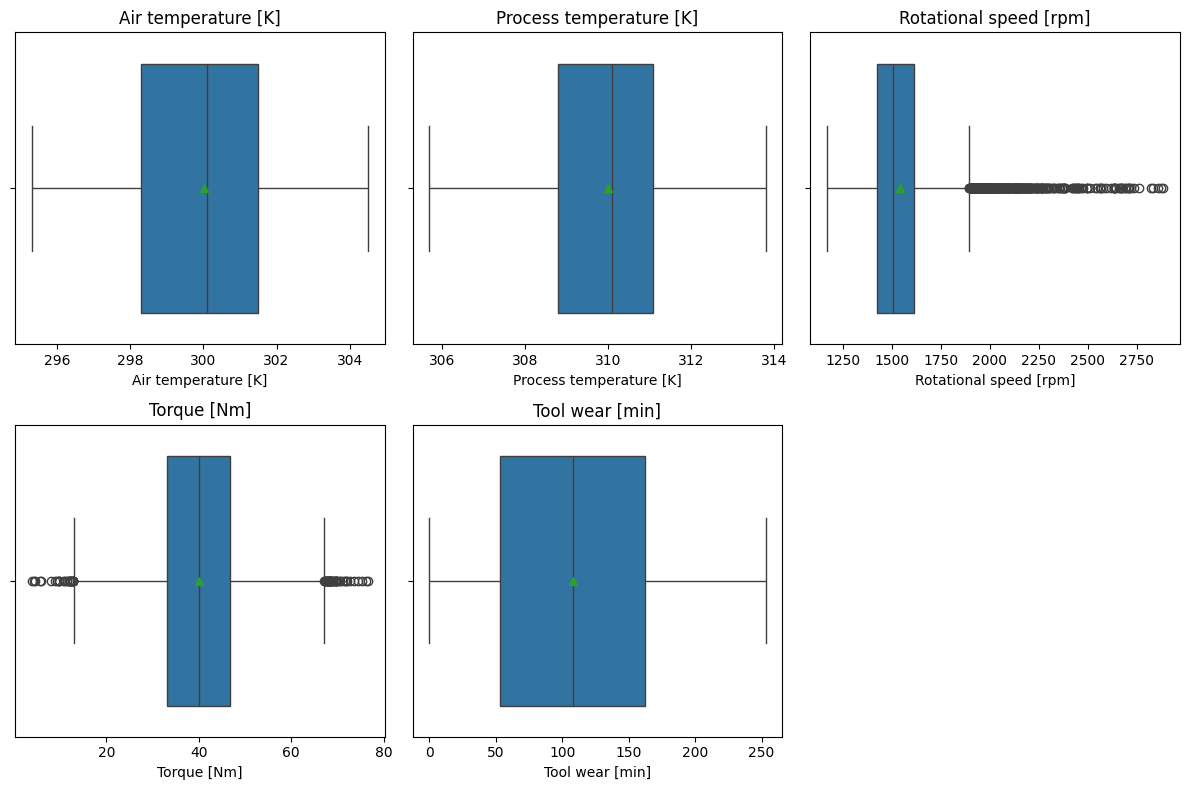

In [15]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], showmeans = True)
    plt.title(feature)

plt.tight_layout()
plt.show()



1. **Air Temperature Boxplot**:
   - The IQR spans from approximately **298** to **302**. The whiskers extend to values around **296** and **304**.
   - There are **no visible outliers** beyond the whiskers.

2. **Process Temperature Boxplot**:
   - It ranges from approximately **325** to **335**. The whiskers extend to values around **315** and **340**.
   - Again, there are **no visible outliers**.

3. **Rotational Speed Boxplot**:
   - The Rotational Speed plot extends from about **1750** to around **2250**.
   - The IQR is relatively small compared to its overall range.
   - However, there are **marked outliers** beyond the whiskers on the right ends.

4. **Torque Boxplot**:
   - The Torque plot ranges roughly between **20** and around **80**.
   - It has a balanced IQR but with ** vsible outliers** or extreme values at both ends.

5. **Tool Wear Boxplot**:
   - The Tool Wear plot spans approximately between **50** and around **250** with **no visible outliers**.

## oversampling

In [16]:
# Check the class distribution
print("Class distribution before oversampling:")
print(df['Machine failure'].value_counts())

Class distribution before oversampling:
Machine failure
0    9661
1     339
Name: count, dtype: int64


In [17]:
# Convert categorical variables to numerical using one-hot encoding, drop_first=True
df = pd.get_dummies(df, columns=["Type"])

In [18]:
X = df.drop(columns=['Machine failure', 'Product ID', 'UDI'])
y = df['Machine failure']

"We noticed that the number of data points in the two classes '0' and '1' are very different. 

This led to overfitting in our model. 

The suitable solution for this problem is to perform oversampling."

In [20]:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import tree
from sklearn.tree import plot_tree

In [22]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine oversampled data into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                          pd.DataFrame(y_resampled, columns=['Machine failure'])], axis=1)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Machine failure'].value_counts())

# Now you can use df_resampled for further analysis and modeling


Class distribution after oversampling:
Machine failure
0    9661
1    9661
Name: count, dtype: int64


In [23]:

# Split the oversampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    auc = roc_auc_score(target, pred)  # Area Under the ROC Curve (AUC-ROC)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "AUC-ROC": auc},
        index=[0]
    )

    return df_perf

#Explanation of Evaluation Metrics:

* **Accuracy:** Measures the proportion of correct predictions made by the model. It's calculated as the number of correct predictions divided by the total number of predictions. A high accuracy is desirable, but it doesn't always tell the whole story (e.g., imbalanced classes).
* **Recall:** Measures the model's ability to correctly identify positive cases (true positives divided by total actual positives).  A high recall is important for scenarios where missing positive cases is costly.
* **Precision:** Measures the model's ability to avoid false positives (true positives divided by total predicted positives). A high precision is important when false positives are very expensive.
* **F1-Score:** The harmonic mean of precision and recall, providing a balanced view of both metrics. A high F1-score indicates the model is performing well in terms of both precision and recall.
* **AUC-ROC:** The Area Under the Receiver Operating Characteristic Curve (ROC). The ROC curve plots the true positive rate (TPR) vs. the false positive rate (FPR) at different classification thresholds. A higher AUC-ROC score (closer to 1) indicates the model can better distinguish between classes.


## model 1: decision tree classifier

In [26]:

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [27]:
# performance on train data
DTC_perf = model_performance_classification(dt_classifier, X_train, y_train)
DTC_perf

,Accuracy,Recall,Precision,F1,AUC-ROC
0,1.0,1.0,1.0,1.0,1.0


In [28]:
# performance on test data
DTC_perf = model_performance_classification(dt_classifier, X_test, y_test)
DTC_perf

,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.975332,0.978936,0.971889,0.9754,0.975335


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Define the scorer with recall as the metric to optimize
scorer = make_scorer(recall_score)


    # Define hyperparameters to tune
parameters = {
    'max_depth': [3, 5, 7,9,11, 13, 15],
    'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
    "max_features": ["auto", "sqrt", "log2", None],
    'criterion': ['gini', 'entropy']
}


# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=parameters, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
tuned_dtc = grid_search.best_estimator_
# Fit the best algorithm to the data.
tuned_dtc.fit(X_train, y_train)

c:\Users\HP\Documents\GitHub\mlops_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
490 fits failed out of a total of 1960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
297 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\Documents\GitHub\mlops_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\Documents\GitHub\mlops_project\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\Documents\GitHub\mlops_project\venv\Lib\site-packages\sklearn\base.py", line 666, in _validat

DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=42)

In [30]:
# performance on train data
model_performance_classification(tuned_dtc, X_train, y_train)


,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.993567,0.997339,0.989877,0.993594,0.993566


In [31]:
# performance on test data
model_performance_classification(tuned_dtc, X_test, y_test)

,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.976885,0.984116,0.970048,0.977031,0.976891


Confusion Matrix:
[[2813   88]
 [  46 2850]]


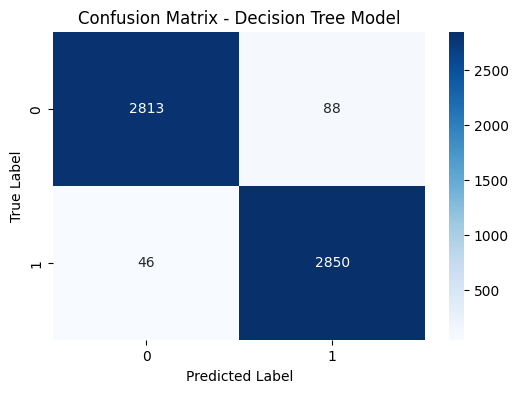

In [32]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = tuned_dtc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix (optional)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")  # Adjust 'Blues' to your preferred colormap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()


In [33]:
importance = tuned_dtc.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                    Feature  Importance
2    Rotational speed [rpm]    0.277849
7                       PWF    0.181439
4           Tool wear [min]    0.157379
3               Torque [Nm]    0.133932
8                       OSF    0.052132
11                   Type_L    0.047615
6                       HDF    0.039081
0       Air temperature [K]    0.034780
5                       TWF    0.027321
1   Process temperature [K]    0.025330
12                   Type_M    0.014597
10                   Type_H    0.008545
9                       RNF    0.000000


## model 2: Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_modele = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limiter la profondeur maximale
    min_samples_split=4,  # Nombre minimum d'échantillons pour diviser un nœud
    min_samples_leaf=2,  # Nombre minimum d'échantillons dans un nœud feuille
    max_features='sqrt',  # Nombre de caractéristiques à considérer pour la meilleure scission
    random_state=42
)

rf_modele.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [35]:
# performance on train data
model_performance_classification(rf_modele, X_train, y_train)


,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.982329,0.979453,0.985132,0.982284,0.98233


In [36]:
# performance on test data
model_performance_classification(rf_modele, X_test, y_test)


,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.977402,0.973412,0.981204,0.977292,0.977399


Confusion Matrix:
[[2847   54]
 [  77 2819]]


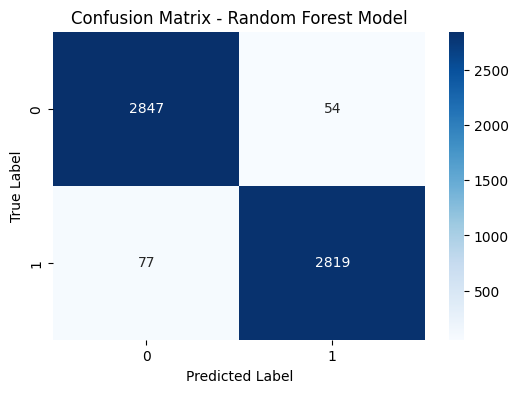

In [37]:
y_pred = rf_modele.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix (optional)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")  # Adjust 'Blues' to your preferred colormap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()


we will pick Random Forest due to its ensemble nature, which helps reduce overfitting and improve generalization.

In [38]:
importance = rf_modele.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                    Feature  Importance
2    Rotational speed [rpm]    0.233087
3               Torque [Nm]    0.210933
4           Tool wear [min]    0.136026
6                       HDF    0.084678
7                       PWF    0.082634
5                       TWF    0.064909
8                       OSF    0.057236
11                   Type_L    0.039567
0       Air temperature [K]    0.034465
12                   Type_M    0.028858
1   Process temperature [K]    0.018903
10                   Type_H    0.008681
9                       RNF    0.000022


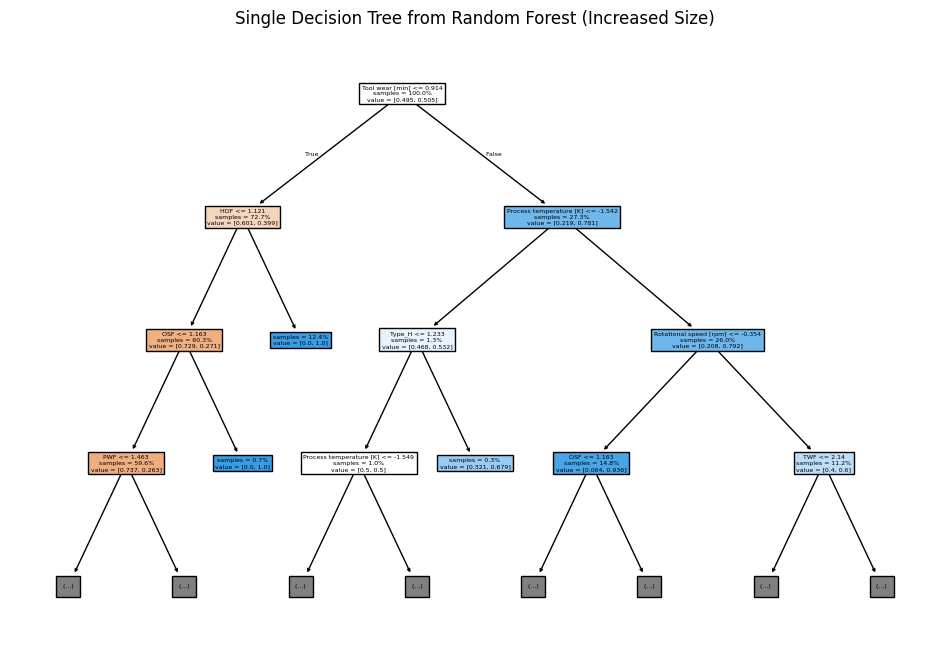

In [39]:
# Get an estimator from the random forest
estimator = rf_modele.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(estimator, feature_names=feature_names, filled=True, max_depth=3, impurity=False, proportion=True)
plt.title("Single Decision Tree from Random Forest (Increased Size)")
plt.show()

## contenarize the model

In [40]:
import joblib
# Save the model and standard scaler
joblib.dump(rf_modele, 'models/predictive_maintenance_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [41]:
#save the columns
joblib.dump(X.columns.tolist(), 'models/model_columns.pkl')

['models/model_columns.pkl']